In [55]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

#data = pd.read_excel (r'C:\Users\Thierry\Documents\Studie\TU Delft Applied Physics\CS4195 Modeling and Data Analysis in Complex Networks\Assignment1\manufacturing_emails_temporal_network.xlsx')
data = pd.read_excel (r'../manufacturing_emails_temporal_network.xlsx')
#data = pd.read_excel (r'C:\Users\rixtb\Documents\Master\Data analysis\Datasets\oefenset.xlsx')

#%% A
Nnodes = np.max([data['node1'].max(), data['node2'].max()])
G = data.drop(['timestamp'],axis=1); B = data.drop_duplicates()

col1 = B['node1']; col1 = col1.tolist()
col2 = B['node2']; col2 = col2.tolist()
col3 = data['timestamp']; col3 = col3.tolist()

shuff = np.random.randint(0,len(col1),len(col3))

G3 = np.zeros([len(col3),3],dtype=int)

for i in range(len(col3)):
    G3[i,:]=np.array([col1[shuff[i]],col2[shuff[i]],col3[i]])

In [18]:
#%% B
tmax = data.timestamp.max()
Infections = np.zeros([tmax,Nnodes])

start = timeit.default_timer()

Aoud = np.eye(Nnodes)
unit = np.eye(Nnodes)

for i in range(1,tmax+1):
    data_temp = G3[G3[:,2]==i]
    A = np.zeros([Nnodes,Nnodes])
    
    for j in range(len(data_temp)):
        A[data_temp[j,0]-1,data_temp[j,1]-1] = 1
        A[data_temp[j,1]-1,data_temp[j,0]-1] = 1
    
    Inf = np.dot(A+unit,Aoud)
    Inf[Inf>0]=1
    Aoud = Inf
    Infections[i-1,:] = np.sum(Inf, axis=0)
        
stop = timeit.default_timer()
print('Time:',stop-start)

Time: 42.220527928788215


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


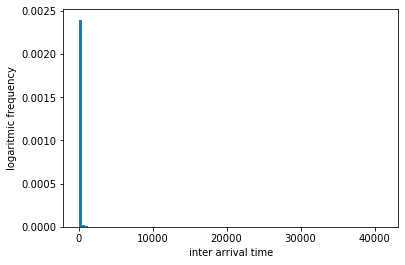

In [83]:
#%% creating the inter-arrival time histogram
dT = []
for i in range(1,Nnodes):
    delta_t = np.array([G3[G3[:,0]==i][:,2]])
    delta_t = np.append(delta_t,G3[G3[:,1]==i][:,2])
    delta_t = np.sort(delta_t)  #sorted list of all timestamps that belong to node i
    if len(delta_t)>1: #must be at least 2 values
        for j in range(len(delta_t)-1):
            diff = delta_t[j+1]-delta_t[j] #time difference
            if diff >0:
                dT = np.append(dT,diff) #one gigantic list of timedifferences
    
plt.hist(dT,bins=100,normed=1)
plt.xlabel('inter arrival time')
plt.ylabel('logaritmic frequency')
plt.gca().set_yscale("log")
plt.show()

In [75]:
len(np.argwhere(dT==0))

0

In [79]:
dT

array([9.0000e+00, 4.0000e+00, 9.0000e+00, ..., 1.7022e+04, 1.0387e+04,
       1.5730e+04])